In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import allplayers_wrangle as wr

# plotting defaults
plt.rc('figure', figsize=(16, 8))
plt.style.use('dark_background')
plt.rc('font', size=16)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
def get_players_stats():
    stats = pd.read_csv('stats.csv')
    return stats.set_index('Player').sort_index(ascending=True)

In [3]:
stats = wr.get_players_stats()
stats

,Rk,Age,Team,GP,GS,MP,FG,FGA,2P,2PA,...,TOV,PF,PPG,FG_PCT,2P_PCT,3P_PCT,FT_PCT,TS_PCT,eFG_PCT,Pos
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,65,33,MIN,32,1,5.90,0.90,2.20,0.50,1.20,...,0.30,0.90,2.30,0.41,0.45,0.35,0.73,0.51,0.49,G
Aaron Gordon,180,22,ORL,58,57,32.90,6.50,14.90,4.50,9.00,...,1.80,1.90,17.60,0.43,0.50,0.34,0.70,0.53,0.50,F
Aaron Harrison,202,23,DAL,9,3,25.90,2.10,7.70,1.10,2.90,...,0.30,3.00,6.70,0.28,0.39,0.21,0.77,0.39,0.34,G
Aaron Jackson,244,31,HOU,1,0,35.00,3.00,9.00,2.00,5.00,...,1.00,4.00,8.00,0.33,0.40,0.25,0.50,0.41,0.39,G
Abdel Nader,363,24,BOS,48,1,10.90,1.00,3.10,0.60,1.80,...,0.70,0.90,3.00,0.34,0.32,0.35,0.59,0.44,0.41,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Randolph,422,36,SAC,59,57,25.60,6.10,12.90,5.30,10.40,...,2.00,2.00,14.50,0.47,0.50,0.35,0.79,0.53,0.51,F-C
Zaza Pachulia,387,33,GSW,69,57,14.10,2.20,3.80,2.20,3.80,...,1.00,1.80,5.40,0.56,0.57,0.00,0.81,0.61,0.56,C
Zhou Qi,418,22,HOU,18,0,6.90,0.30,1.80,0.20,0.70,...,0.60,0.80,1.20,0.19,0.31,0.10,0.67,0.29,0.22,F-C


In [4]:
advstats = wr.get_advstats()
advstats

,WS,ORtg,DRtg,OWS,DWS,OBPM,DBPM,BPM,VORP,PER,ORB_PCT,DRB_PCT,TRB_PCT,AST_PCT,STL_PCT,BLK_PCT,TOV_PCT,USG_PCT
Player,,,,,,,,,,,,,,,,,,
Aaron Brooks,0.10,103.00,115,0.10,0.10,-2.60,-1.30,-3.80,-0.10,9.80,4.20,6.20,5.20,15.10,1.60,0.00,13.00,19.90
Aaron Gordon,2.90,103.00,109,0.90,2.00,0.90,-0.60,0.30,1.10,16.50,5.00,21.50,13.20,11.70,1.50,1.90,10.00,24.70
Aaron Harrison,-0.10,87.00,110,-0.30,0.20,-6.80,-0.60,-7.50,-0.30,5.10,1.80,9.90,5.70,6.70,1.90,0.80,3.80,15.50
Aaron Jackson,0.00,91.00,114,0.00,0.00,-6.60,-2.30,-8.90,-0.10,2.40,6.50,3.20,4.80,4.00,0.00,0.00,9.20,13.70
Abdel Nader,-0.10,83.00,105,-0.90,0.80,-5.50,0.20,-5.30,-0.40,5.10,2.80,12.00,7.40,7.10,1.40,1.60,17.00,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Randolph,1.50,101.00,111,0.30,1.20,0.50,-1.50,-1.00,0.40,17.30,7.00,23.70,15.00,14.90,1.40,0.60,12.50,27.60
Zaza Pachulia,3.30,117.00,105,1.80,1.40,-0.70,0.70,0.00,0.50,17.00,11.00,25.00,18.50,15.20,1.90,1.40,19.10,17.00
Zhou Qi,-0.30,61.00,102,-0.50,0.20,-10.30,0.20,-10.10,-0.30,1.90,5.50,14.40,10.00,2.10,0.80,9.60,21.20,16.80


In [5]:
def get_salaries():
    salaries = pd.read_csv('NBA_season1718_salary.csv')
    salaries.drop(columns=['Unnamed: 0','Tm'],inplace=True)
    salaries.rename(columns = {'season17_18' : 'salary'},inplace=True)
    return salaries.set_index('Player').sort_index(ascending=True)

In [6]:
salaries = get_salaries()
salaries

,salary
Player,
A.J. Hammons,1312611.00
Aaron Brooks,2116955.00
Aaron Gordon,5504420.00
Aaron Gray,452059.00
Abdel Nader,1167333.00
...,...
Zach Collins,3057240.00
Zach LaVine,3202217.00
Zach Randolph,12307692.00


In [7]:
ss = wr.prepare_ss()
ss

,age,gp,gs,mp,fg,fga,2p,2pa,3p,3pa,...,usg_pct,above_avg_scorer,above_avg_3ball,above_avg_ft,above_avg_ts,above_avg_usg_pct,salary,C,F,G
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,33.00,32.00,1.00,5.90,0.90,2.20,0.50,1.20,0.30,1.00,...,19.90,0.00,0.00,0.00,0.00,1.00,2116955.00,0.00,0.00,1.00
Aaron Gordon,22.00,58.00,57.00,32.90,6.50,14.90,4.50,9.00,2.00,5.90,...,24.70,1.00,0.00,0.00,0.00,1.00,5504420.00,0.00,1.00,0.00
Abdel Nader,24.00,48.00,1.00,10.90,1.00,3.10,0.60,1.80,0.50,1.40,...,17.10,0.00,0.00,0.00,0.00,0.00,1167333.00,0.00,1.00,0.00
Al Horford,31.00,72.00,72.00,31.60,5.10,10.50,3.80,7.30,1.30,3.10,...,18.40,0.00,1.00,1.00,1.00,0.00,27734405.00,1.00,0.00,0.00
Al Jefferson,33.00,36.00,1.00,13.40,3.10,5.80,3.10,5.70,0.00,0.10,...,22.50,0.00,0.00,1.00,1.00,1.00,9769821.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins,20.00,66.00,1.00,15.80,1.70,4.40,1.20,2.70,0.50,1.70,...,15.40,0.00,0.00,0.00,0.00,0.00,3057240.00,1.00,0.00,0.00
Zach LaVine,22.00,24.00,24.00,27.30,5.70,14.80,3.90,9.70,1.80,5.10,...,29.50,1.00,0.00,1.00,0.00,1.00,3202217.00,0.00,0.00,1.00
Zach Randolph,36.00,59.00,57.00,25.60,6.10,12.90,5.30,10.40,0.90,2.50,...,27.60,0.00,0.00,1.00,0.00,1.00,12307692.00,0.00,1.00,0.00


In [8]:
train, val, test = wr.wrangle_ss()
train.shape, val.shape, test.shape

((232, 55), (100, 55), (83, 55))

In [9]:
train.head()

,age,gp,gs,mp,fg,fga,2p,2pa,3p,3pa,...,usg_pct,above_avg_scorer,above_avg_3ball,above_avg_ft,above_avg_ts,above_avg_usg_pct,salary,C,F,G
Player,,,,,,,,,,,,,,,,,,,,,
Paul Zipser,23.00,54.00,12.00,15.30,1.50,4.30,0.80,2.30,0.70,2.00,...,15.20,0.00,0.00,0.00,0.00,0.00,1312611.00,0.00,0.00,1.00
Joe Ingles,30.00,82.00,81.00,31.40,4.10,8.80,1.60,3.10,2.50,5.70,...,15.90,0.00,1.00,1.00,1.00,0.00,14136364.00,0.00,1.00,0.00
Bismack Biyombo,25.00,82.00,25.00,18.20,2.20,4.30,2.20,4.30,0.00,0.00,...,14.90,0.00,0.00,0.00,1.00,0.00,17000000.00,1.00,0.00,0.00
Gerald Green,32.00,41.00,2.00,22.70,4.10,10.10,1.40,2.80,2.70,7.30,...,22.40,0.00,1.00,1.00,1.00,1.00,947248.00,0.00,0.00,1.00
Rodney Purvis,23.00,16.00,2.00,18.10,2.20,6.70,1.40,3.40,0.80,3.30,...,18.70,0.00,0.00,1.00,0.00,1.00,46080.00,0.00,0.00,1.00


# Data Exploration

## Exploring Target variable (Salary)

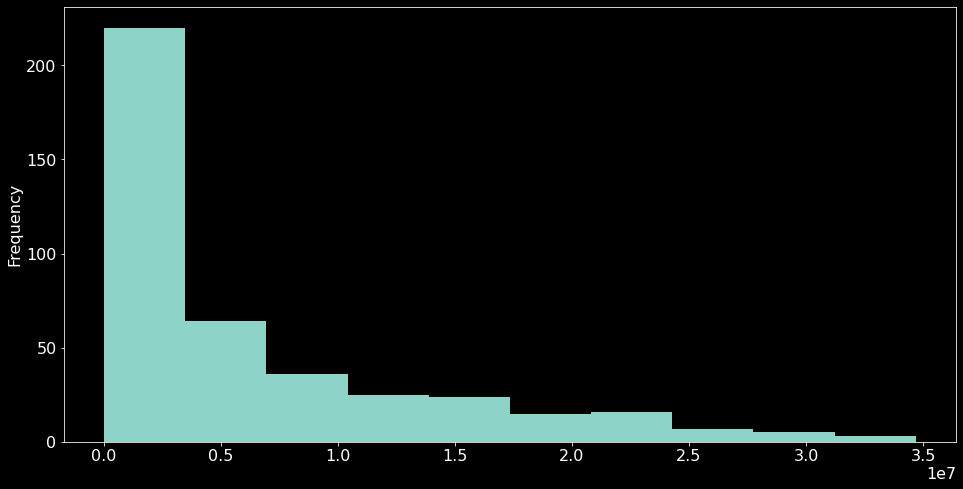

In [10]:
ss.salary.plot.hist()
plt.show()

## Which scoring aspect affects a players salary the most?

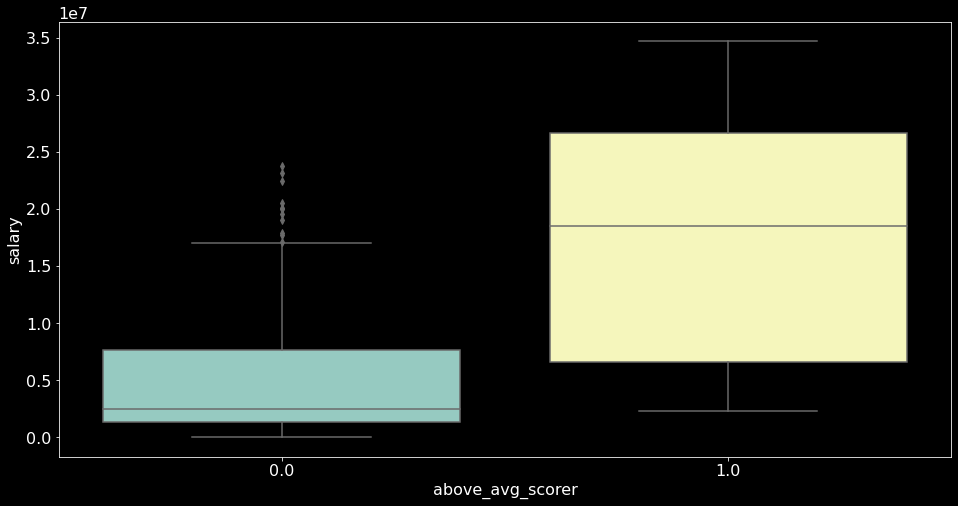

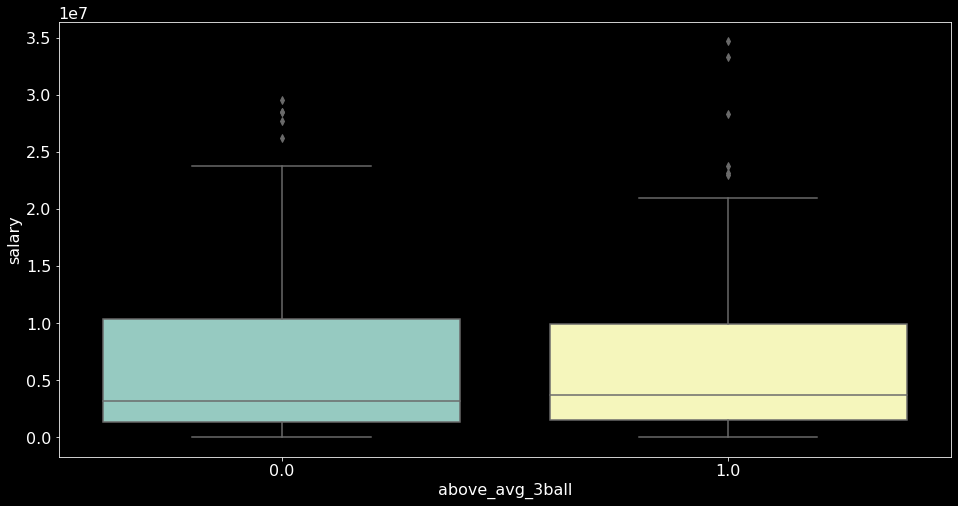

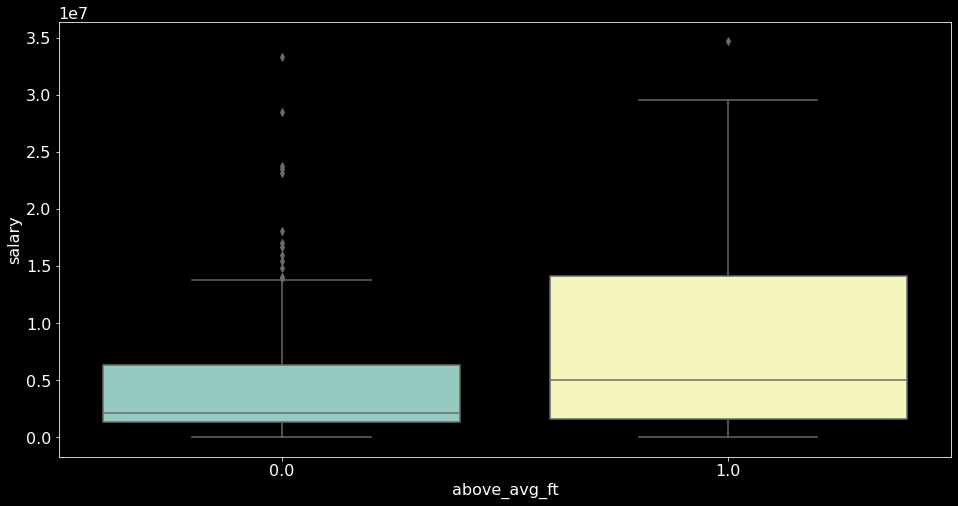

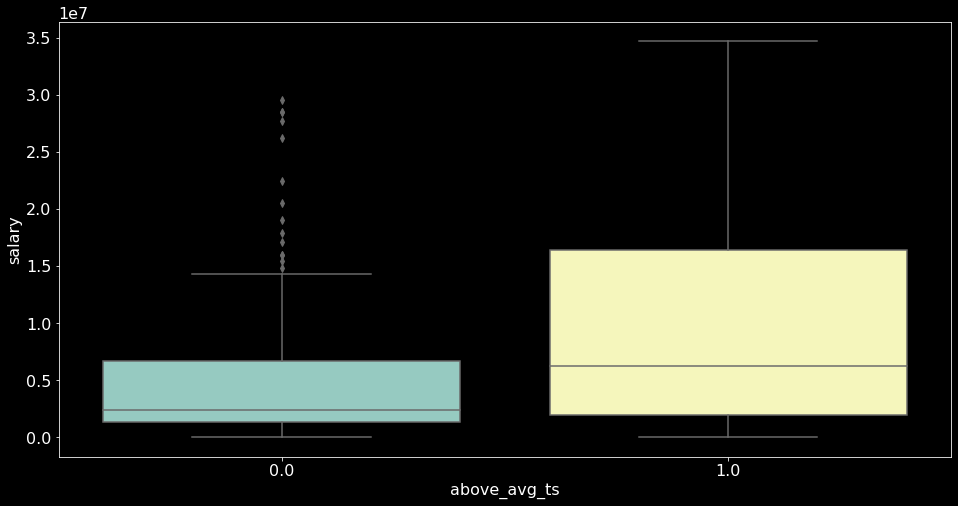

In [11]:
shooting_stats = ['above_avg_scorer','above_avg_3ball','above_avg_ft','above_avg_ts']

for i in shooting_stats:
    sns.boxplot(x=i, y='salary', data=train)
    plt.show()

### Takeaways
- It seems that all of the feature engineered statistics, being above the league average in a scoring metric will land you a higher salary than those who do fall below league average.

- The biggest difference in salary is between a player who is above league average in scoring and players who are not above league average.

- This follows common logic as teams will see players are both more efficient and score at a higher rate as more valuable than those who need more shots to score or do not score as efficiently.


#### Scoring statistical testing
(H_0): Players with an above avg TS% and PPG DO NOT earn a significantly different salary than then the rest of the league.

(H_a): Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.

In [12]:
not_a_baller = ss[(ss.above_avg_scorer == 0)&(ss.above_avg_ts == 0)].salary
baller = ss[(ss.above_avg_scorer == 1)&(ss.above_avg_ts == 1)].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(baller, not_a_baller)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(baller, not_a_baller, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.


## Does a players usage percentage affect their salary?


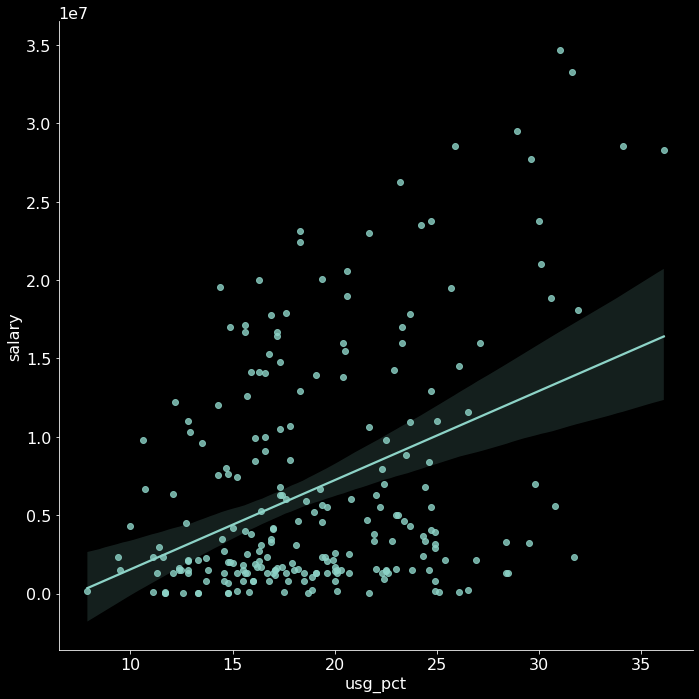

In [13]:
sns.lmplot(x='usg_pct', y='salary', data=train, height=10)
plt.show()

## Takeaways
- The reason for asking this question was to see if players who handled the ball more got paid more.

- It seems that be that there is some relationship between usgae percentage and salary.

- Perhaps teams see that if a player is to be running the offense more or handling the ball more they should be paid more to do so.

#### USG % statistical testing
(H_0): Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.

(H_a): Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

In [14]:
notta_floor_general = ss[ss.above_avg_usg_pct == 0].salary
floor_general = ss[ss.above_avg_usg_pct == 1].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(floor_general, notta_floor_general)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(floor_general, notta_floor_general, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.


## Does a players VORP (Value Over Replacement Player) affect their salary?

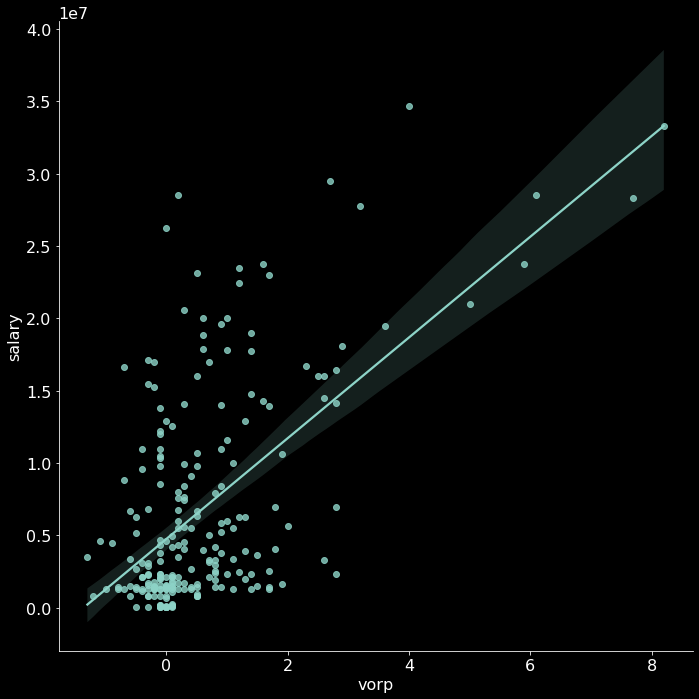

In [15]:
sns.lmplot(x='vorp', y='salary', data=train, height=10)
plt.show()

### Takeaways
- With VORP being a stat the compares how a player affect's it's teams play it would make sense to think that players with higher VORP's also get paid more.
- Visually we can that that is the case, let's see if statistical testing can help prove that.

In [16]:
below_avg_vorp = ss[ss.vorp < ss.vorp.mean()].salary
above_avg_vorp = ss[ss.vorp >= ss.vorp.mean()].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(above_avg_vorp, below_avg_vorp)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(above_avg_vorp, below_avg_vorp, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg VORP DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg VORP DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg VORP DO earn a significantly different salary than then the rest of the league.


## Does position affect a players salary?

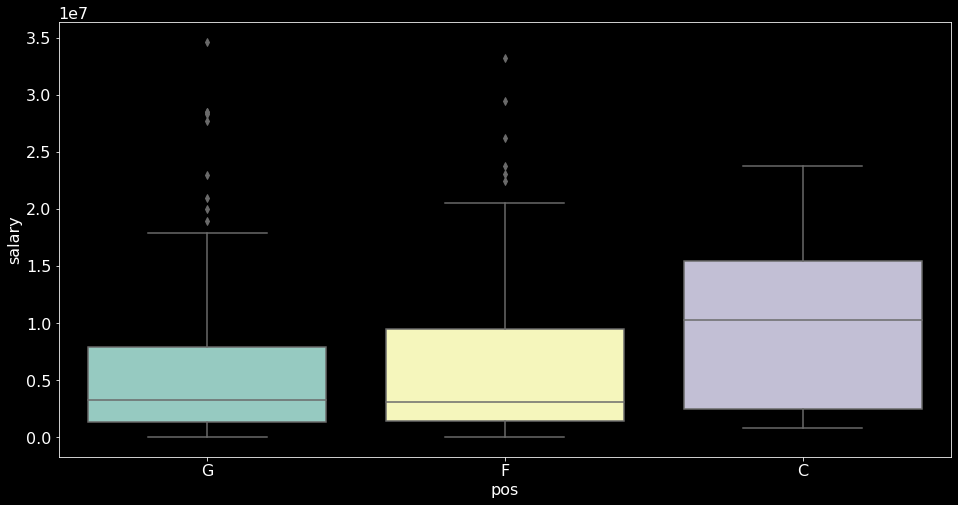

In [17]:
sns.boxplot(x='pos', y='salary', data=train)
plt.show()

### Takeaways
- Visually we see that players who are centers are paid more than those who are guards or wings.
- This goes against the common arguement that guards are more valuable in today's game.
- Let's see if statistical testing shows that or not.

#### USG % statistical testing
(H_0): Centers DO NOT make more than the league average.

(H_a): Centers DO make more than the league average.

In [18]:
centers_sal = train[train.pos == 'C'].salary
league_avg_sal = train.salary.mean()

# Set alpha
alpha = 0.05

t, p = st.ttest_1samp(centers_sal, league_avg_sal)

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Centers DO make more than the league average.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Centers DO NOT make more than the league average.''')

Reject the Null Hypothesis.
    
Centers DO make more than the league average.


## Exploration Summary

- Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.

- Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

- Players with an above avg VORP DO earn a significantly different salary than then the rest of the league.

- We saw that a position that a player pays does have a impact on their salary.

# Modeling

In [19]:
train.columns[train.dtypes != 'object']

Index(['age', 'gp', 'gs', 'mp', 'fg', 'fga', '2p', '2pa', '3p', '3pa', 'ft',
       'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'ppg',
       'fg_pct', '2p_pct', '3p_pct', 'ft_pct', 'ts_pct', 'efg_pct', 'ws',
       'ortg', 'drtg', 'ows', 'dws', 'obpm', 'dbpm', 'bpm', 'vorp', 'per',
       'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'usg_pct', 'above_avg_scorer', 'above_avg_3ball',
       'above_avg_ft', 'above_avg_ts', 'above_avg_usg_pct', 'salary', 'C', 'F',
       'G'],
      dtype='object')

In [20]:
x_train = train.drop(columns=['salary','pos'])
y_train = train.salary

x_val = val.drop(columns=['salary','pos'])
y_val = val.salary

x_test = test.drop(columns=['salary','pos'])
y_test = test.salary

y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

In [21]:
def min_max_scale(x_train, x_val, x_test):
    """
    this function takes in 3 dataframes with the same columns,
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler.
    it returns 3 dataframes with the same column names and scaled values.
    """
    # create the scaler object and fit it to x_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).

    scaler = MinMaxScaler(copy=True).fit(x_train)

    xtrains = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns).set_index([x_train.index])
    xvals = pd.DataFrame(scaler.transform(x_val), columns = x_val.columns).set_index([x_val.index])
    xtests = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns).set_index([x_test.index])

    # scale x_train, x_val, x_test using the mins and maxes stored in the scaler derived from x_train.
    

    return xtrains, xvals, xtests

In [22]:
xtrains, xvals, xtests = min_max_scale(x_train, x_val, x_test)

In [23]:
# Looking for feature correlation



In [24]:
# Going to use features I investigated along with age and winshare, as domain knowledges 
# suggests that the age of a player as well as a players contribution to winning affect their salary
# As well as using common statistics tha many causal fans find useful in player comparison
xtrains = xtrains[['ppg','ft_pct','usg_pct','vorp','ts_pct','age','ws','ast', 'stl', 'blk', 'tov', 'pf']]
xvals = xvals[['ppg','ft_pct','usg_pct','vorp','ts_pct','age','ws','ast', 'stl', 'blk', 'tov', 'pf']]

In [25]:
pred_mean = y_train.salary.mean()
y_train['pred_mean'] = pred_mean
y_val['pred_mean'] = pred_mean
rmse_train = mean_squared_error(y_train.salary, y_train.pred_mean, squared=False)
rmse_validate = mean_squared_error(y_val.salary, y_val.pred_mean, squared=False)


# save the results
metric_df = pd.DataFrame(data=[{
    'model': 'baseline_mean',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.salary, y_train.pred_mean),
    'rmse_validate': rmse_validate,
    'r2_validate': explained_variance_score(y_val.salary, y_val.pred_mean)
    }])

# LassoLars Model
lars = LassoLars(alpha=2)
lars.fit(xtrains, y_train.salary)
y_train['pred_lars'] = lars.predict(xtrains)
rmse_train = mean_squared_error(y_train.salary, y_train.pred_lars, squared=False)
y_val['pred_lars'] = lars.predict(xvals)
rmse_validate = mean_squared_error(y_val.salary, y_val.pred_lars, squared=False)

# save the results
metric_df = metric_df.append({
    'model': 'LarsLasso, alpha 3',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.salary, y_train.pred_lars),
    'rmse_validate': rmse_validate,
    'r2_validate': explained_variance_score(y_val.salary, y_val.pred_lars)}, ignore_index=True)

# create the model object
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(xtrains, y_train.salary)
y_train['glm_pred'] = glm.predict(xtrains)
rmse_train = mean_squared_error(y_train.salary, y_train.glm_pred)**(1/2)
y_val['glm_pred'] = glm.predict(xvals)
rmse_validate = mean_squared_error(y_val.salary, y_val.glm_pred)**(1/2)


# save the results
metric_df = metric_df.append({
    'model': 'Tweedie Regressor',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.salary, y_train.glm_pred),
    'rmse_validate': rmse_validate,
    'r2_validate': explained_variance_score(y_val.salary, y_val.glm_pred)}, ignore_index=True)


# create the model object
pf = PolynomialFeatures(degree=2)
X_train_degree2 = pf.fit_transform(xtrains)
X_validate_degree2 = pf.transform(xvals)
lm = LinearRegression()
lm.fit(X_train_degree2, y_train.salary)
y_train['salary_pred_pf'] = lm.predict(X_train_degree2)
rmse_train = mean_squared_error(y_train.salary, y_train.salary_pred_pf)**(1/2)
y_val['salary_pred_pf'] = lm.predict(X_validate_degree2)
rmse_validate = mean_squared_error(y_val.salary, y_val.salary_pred_pf)**(1/2)


# save the results
metric_df = metric_df.append({
    'model': 'Polynomial Features, D2',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.salary, y_train.salary_pred_pf),
    'rmse_validate': rmse_validate,
    'r2_validate': explained_variance_score(y_val.salary, y_val.salary_pred_pf)}, ignore_index=True)


# create the model object
pf = PolynomialFeatures(degree=3)
X_train_degree2 = pf.fit_transform(xtrains)
X_validate_degree2 = pf.transform(xvals)
lm = LinearRegression()
lm.fit(X_train_degree2, y_train.salary)
y_train['salary_pred_pf'] = lm.predict(X_train_degree2)
rmse_train = mean_squared_error(y_train.salary, y_train.salary_pred_pf)**(1/2)
y_val['salary_pred_pf'] = lm.predict(X_validate_degree2)
rmse_validate = mean_squared_error(y_val.salary, y_val.salary_pred_pf)**(1/2)


# save the results
metric_df = metric_df.append({
    'model': 'Polynomial Features, D3',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.salary, y_train.salary_pred_pf),
    'rmse_validate': rmse_validate,
    'r2_validate': explained_variance_score(y_val.salary, y_val.salary_pred_pf)}, ignore_index=True)
    
metric_df

,model,rmse_train,r2_train,rmse_validate,r2_validate
0,baseline_mean,7519504.17,0.00,6809157.06,0.00
1,"LarsLasso, alpha 3",5064387.23,0.55,4826368.71,0.51
2,Tweedie Regressor,4893225.46,0.58,4644594.78,0.55
3,"Polynomial Features, D2",3525401.07,0.78,5146713.31,0.43
4,"Polynomial Features, D3",318403.96,1.00,95616549760232.66,-202120333434623.62


### Will be using the Tweedie Regressor model as it is the most consistent when going from seen to unseen data.

In [26]:
xtests = xtests[['ppg','ft_pct','usg_pct','vorp','ts_pct','age','ws','ast', 'stl', 'blk', 'tov', 'pf']]

#baseline model
pred_mean = y_train.salary.mean()
y_train['pred_mean'] = pred_mean
y_val['pred_mean'] = pred_mean
y_test['pred_mean'] = pred_mean
base_rmse_train = mean_squared_error(y_train.salary, y_train.pred_mean, squared=False)
base_rmse_validate = mean_squared_error(y_val.salary, y_val.pred_mean, squared=False)
base_rmse_test = mean_squared_error(y_test.salary, y_test.pred_mean, squared=False)

# create the model object
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(xtrains, y_train.salary)
y_train['glm_pred'] = glm.predict(xtrains)
rmse_train = mean_squared_error(y_train.salary, y_train.glm_pred)**(1/2)
y_val['glm_pred'] = glm.predict(xvals)
rmse_validate = mean_squared_error(y_val.salary, y_val.glm_pred)**(1/2)
y_test['glm_pred'] = glm.predict(xtests)
rmse_test = mean_squared_error(y_test.salary, y_test.glm_pred, squared=False)

test_metrics = pd.DataFrame({'baseline': 
                            {'rmse': base_rmse_train, 
                            'r2': explained_variance_score(y_train.salary, y_train.glm_pred)},
    
                        'train': 
                            {'rmse': rmse_train, 
                            'r2': explained_variance_score(y_train.salary, y_train.glm_pred)},
                        'validate': 
                            {'rmse': rmse_validate, 
                            'r2': explained_variance_score(y_val.salary, y_val.glm_pred)},
                        'test': 
                            {'rmse': rmse_test, 
                            'r2': explained_variance_score(y_test.salary, y_test.glm_pred)}
                            })

test_metrics.T

,rmse,r2
baseline,7519504.17,0.58
train,4893225.46,0.58
validate,4644594.78,0.55
test,5215714.08,0.54
